In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spamemail.csv")

In [3]:
df.sample(5)

,email,label
129,Claim your inheritance now! Click here to acce...,spam
2,We're hiring! Check out our career opportuniti...,ham
171,You've been chosen for a free iPhone. Click he...,spam
174,We're pleased to inform you that your refund h...,ham
50,You've been selected for a special prize. Clic...,spam


## 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [5]:
# renaming the col name
df.rename(columns={'label':'target'}, inplace= True)

In [6]:
df.sample(5)

,email,target
16,You're a winner! Click here to claim your excl...,spam
13,We're thrilled to introduce our new collection...,ham
47,You've been selected for a free iPhone X. Clic...,spam
115,You're our lucky winner! Click here to claim y...,spam
172,Congratulations! You've won a free trip to Eur...,spam


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.head()

,email,target
0,Upgrade to our premium plan for exclusive acce...,0
1,Happy holidays from our team! Wishing you joy ...,0
2,We're hiring! Check out our career opportuniti...,0
3,Your Amazon account has been locked. Click her...,1
4,Your opinion matters! Take our survey and help...,0


In [10]:
# missing values
df.isnull().sum()

email     0
target    0
dtype: int64

In [11]:
# duplicated values 
df.duplicated().sum()

29

In [12]:
#drop the duplicated values and keep the first value
df = df.drop_duplicates(keep='first')

In [13]:
df.shape

(150, 2)

## 2. EDA

In [14]:
df.head()

,email,target
0,Upgrade to our premium plan for exclusive acce...,0
1,Happy holidays from our team! Wishing you joy ...,0
2,We're hiring! Check out our career opportuniti...,0
3,Your Amazon account has been locked. Click her...,1
4,Your opinion matters! Take our survey and help...,0


In [15]:
df['target'].value_counts() # 0--> not spam & 1--> spam

target
0    100
1     50
Name: count, dtype: int64

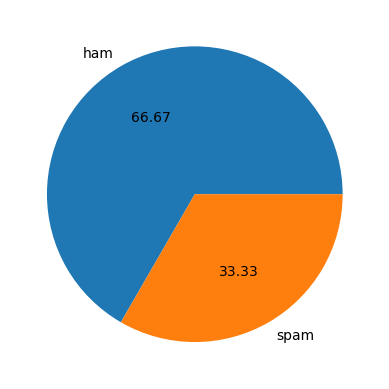

In [16]:
#check the percent of ham and spam msgs
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() ,labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [17]:
!pip install nltk

In [18]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Svc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# no of words used in each sentance
df['email'].apply(len)

0      81
1      73
2      75
3      83
4      74
       ..
174    77
175    72
176    85
177    68
178    76
Name: email, Length: 150, dtype: int64

In [20]:
#new col to count no if char in a sentance
df['num_of_characters'] = df['email'].apply(len)

In [21]:
df.head()

,email,target,num_of_characters
0,Upgrade to our premium plan for exclusive acce...,0,81
1,Happy holidays from our team! Wishing you joy ...,0,73
2,We're hiring! Check out our career opportuniti...,0,75
3,Your Amazon account has been locked. Click her...,1,83
4,Your opinion matters! Take our survey and help...,0,74


In [22]:
# this divides each sentance into words
df['email'].apply(lambda x:nltk.word_tokenize(x))

0      [Upgrade, to, our, premium, plan, for, exclusi...
1      [Happy, holidays, from, our, team, !, Wishing,...
2      [We, 're, hiring, !, Check, out, our, career, ...
3      [Your, Amazon, account, has, been, locked, ., ...
4      [Your, opinion, matters, !, Take, our, survey,...
                             ...                        
174    [We, 're, pleased, to, inform, you, that, your...
175    [Get, rich, quick, !, Invest, in, our, revolut...
176    [Your, free, trial, period, is, ending, soon, ...
177    [Your, order, is, on, its, way, !, Track, your...
178    [Limited-time, offer, !, Get, 50, %, off, on, ...
Name: email, Length: 150, dtype: object

In [23]:
# no of words used in each sentance
df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

0      14
1      14
2      15
3      15
4      14
       ..
174    14
175    14
176    16
177    14
178    18
Name: email, Length: 150, dtype: int64

In [24]:
# new col for storing no of words
df['no of words'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
# new col for storing no of sentances
df['no of sentances'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,email,target,num_of_characters,no of words,no of sentances
0,Upgrade to our premium plan for exclusive acce...,0,81,14,1
1,Happy holidays from our team! Wishing you joy ...,0,73,14,2
2,We're hiring! Check out our career opportuniti...,0,75,15,2
3,Your Amazon account has been locked. Click her...,1,83,15,2
4,Your opinion matters! Take our survey and help...,0,74,14,2


In [27]:
# checking how many words or sentences are used per 
df[['num_of_characters','no of words','no of sentances']].describe()

,num_of_characters,no of words,no of sentances
count,150.000000,150.000000,150.000000
mean,77.393333,15.553333,2.053333
std,10.537817,2.141118,0.380509
min,52.000000,11.000000,1.000000
25%,69.250000,14.000000,2.000000
50%,78.000000,15.000000,2.000000
75%,85.000000,17.000000,2.000000
max,107.000000,22.000000,3.000000


In [28]:
# ham msgs
df[df['target'] == 0][['num_of_characters','no of words','no of sentances']].describe()

,num_of_characters,no of words,no of sentances
count,100.000000,100.000000,100.000000
mean,78.680000,15.740000,1.980000
std,9.073082,2.130206,0.317185
min,52.000000,11.000000,1.000000
25%,73.000000,14.000000,2.000000
50%,79.000000,15.000000,2.000000
75%,85.000000,17.000000,2.000000
max,98.000000,22.000000,3.000000


In [29]:
# spam msgs
df[df['target'] == 1][['num_of_characters','no of words','no of sentances']].describe()

,num_of_characters,no of words,no of sentances
count,50.000000,50.000000,50.000000
mean,74.820000,15.180000,2.200000
std,12.696922,2.135129,0.451754
min,56.000000,12.000000,1.000000
25%,64.500000,14.000000,2.000000
50%,73.000000,15.000000,2.000000
75%,83.750000,16.000000,2.000000
max,107.000000,21.000000,3.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_of_characters', ylabel='Count'>

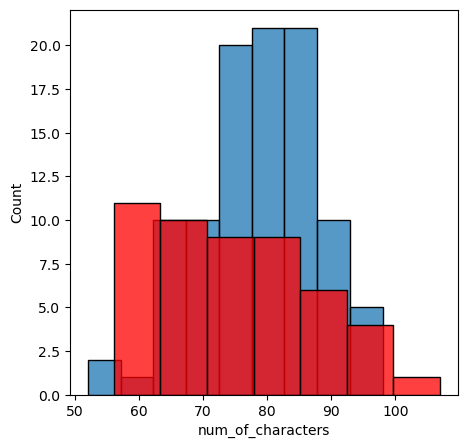

In [85]:
# this histogram depicts that usually spam msgs are made of more characters
plt.figure(figsize =(5,5))
sns.histplot(df[df['target'] == 0]['num_of_characters'])
sns.histplot(df[df['target'] == 1]['num_of_characters'], color='red')

<Axes: xlabel='no of words', ylabel='Count'>

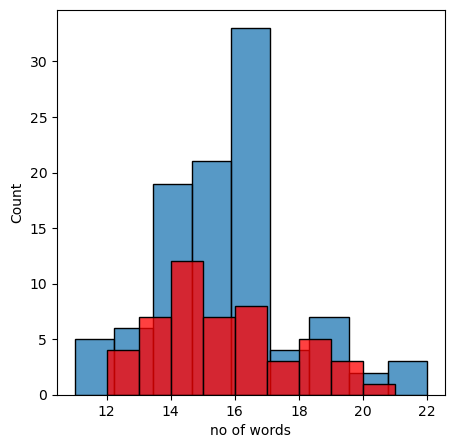

In [84]:
# this histogram depicts that usually spam msgs are made of more words
plt.figure(figsize =(5,5))
sns.histplot(df[df['target'] == 0]['no of words'])
sns.histplot(df[df['target'] == 1]['no of words'], color='red')

## 3. Data Preprocessing
 - Lower Case
 - Tokenization - breaking into words
 - Removing special characters
 - Removing stopwords and punctuation
 - Stemming - converting the words into one words which has same meaning (eg dance,dancing,danced)
 

In [40]:
# creating a function that would perform all the above steps
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #loop for removing special char
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #loop for removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #stemming
    for i in text:
        ps.stem(i)
        y.append(ps.stem(i))
        
    return " ".join(y)

In [37]:
from nltk.corpus import stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('living')

'live'

In [41]:
transform("The price OF 10$ IN INR is 8000, Do you want to exchange the curreny atharv?, are you enjoying today's work?")

'price 10 inr 8000 want exchang curreni atharv enjoy today work'

In [42]:
# applied the function on email col for transformation
df['email'].apply(transform)

0      upgrad premium plan exclus access premium cont...
1             happi holiday team wish joy prosper season
2             hire check career opportun join dynam team
3        amazon account lock click verifi account inform
4       opinion matter take survey help us enhanc experi
                             ...                        
174                  pleas inform refund process success
175    get rich quick invest revolutionari new scheme...
176    free trial period end soon upgrad continu enjo...
177                       order way track shipment updat
178                      offer get 50 purchas today miss
Name: email, Length: 150, dtype: object

In [43]:
# adding the transformed email into new col
df['transformed email'] = df['email'].apply(transform)

In [44]:
df.head()

,email,target,num_of_characters,no of words,no of sentances,transformed email
0,Upgrade to our premium plan for exclusive acce...,0,81,14,1,upgrad premium plan exclus access premium cont...
1,Happy holidays from our team! Wishing you joy ...,0,73,14,2,happi holiday team wish joy prosper season
2,We're hiring! Check out our career opportuniti...,0,75,15,2,hire check career opportun join dynam team
3,Your Amazon account has been locked. Click her...,1,83,15,2,amazon account lock click verifi account inform
4,Your opinion matters! Take our survey and help...,0,74,14,2,opinion matter take survey help us enhanc experi


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height= 500, min_font_size=10, background_color='black')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed email'].str.cat(sep=" "))

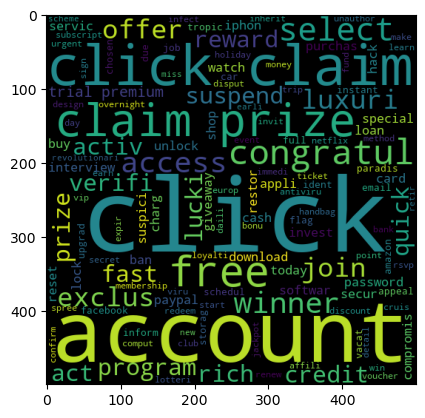

In [47]:
plt.imshow(spam_wc)

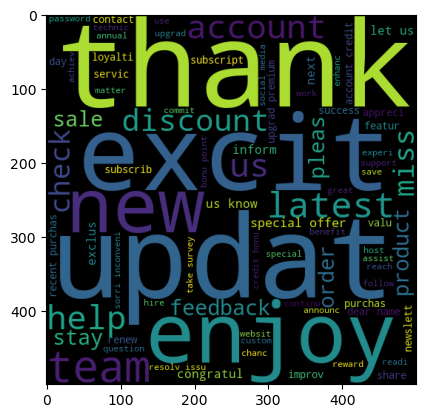

In [48]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed email'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [51]:
df[df['target']==1]['transformed email'].tolist()

['amazon account lock click verifi account inform',
 'email account storag full click upgrad account',
 'chosen free iphon click claim prize',
 'loan click appli',
 'winner click claim exclus prize',
 'facebook account hack click secur account',
 'congratul select job interview click schedul interview',
 'account suspend due suspici activ click unlock account',
 'paypal account suspend click restor account access',
 'luxuri car click claim prize',
 'account flag suspici activ click verifi ident',
 'get instant cash click access quick loan servic',
 'account ban click appeal ban',
 'congratul free vacat tropic paradis claim',
 'account credit card click appli',
 'select free trial premium membership click sign',
 'select free trial premium servic click activ',
 'account hack click reset password',
 'select free iphon click claim prize',
 'congratul free trip europ click claim prize',
 'select special prize click claim reward',
 'comput infect viru click download antiviru softwar',
 'get

In [53]:
spam_corpus = []
for msg in df[df['target']==1]['transformed email'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
    

In [54]:
len(spam_corpus)

322

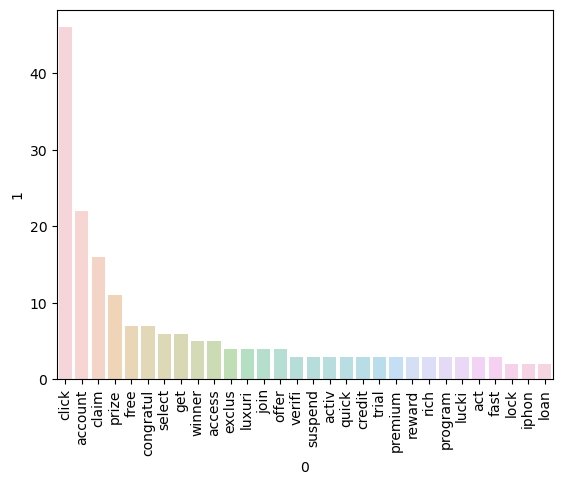

In [87]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],alpha=0.4)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target']==0]['transformed email'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [58]:
len(ham_corpus)

704

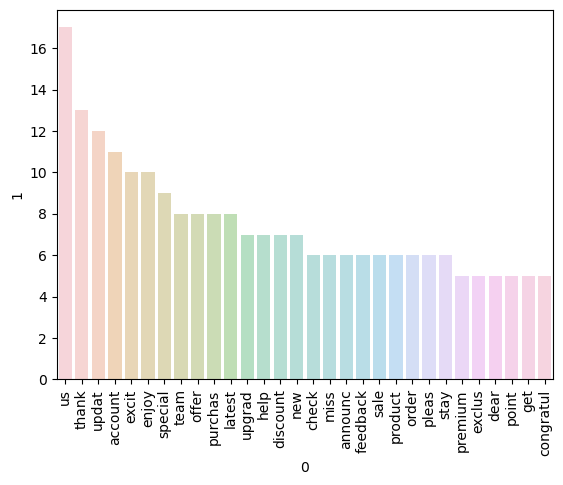

In [59]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],alpha=0.4)
plt.xticks(rotation='vertical')
plt.show()

## 3. Model Building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [73]:
X = tfidf.fit_transform(df['transformed email']).toarray()

In [74]:
X.shape

(150, 374)

In [75]:
Y = df['target'].values

In [76]:
Y

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test, y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.9
[[18  1]
 [ 2  9]]
0.9


In [82]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9666666666666667
[[19  0]
 [ 1 10]]
1.0


In [83]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9666666666666667
[[18  1]
 [ 0 11]]
0.9166666666666666


In [88]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))